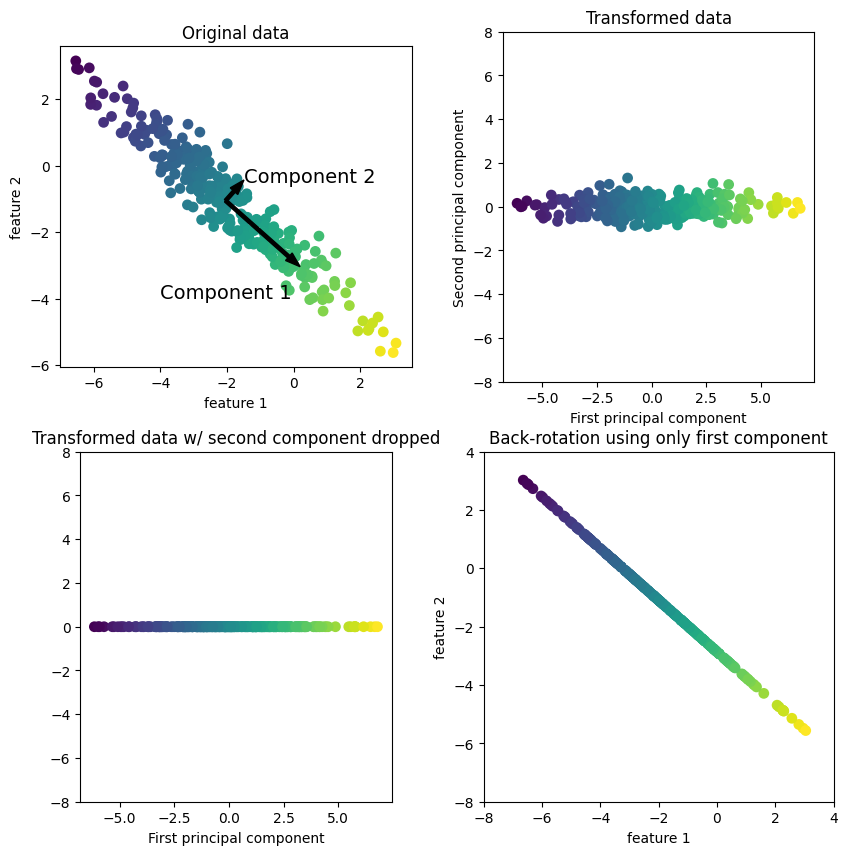

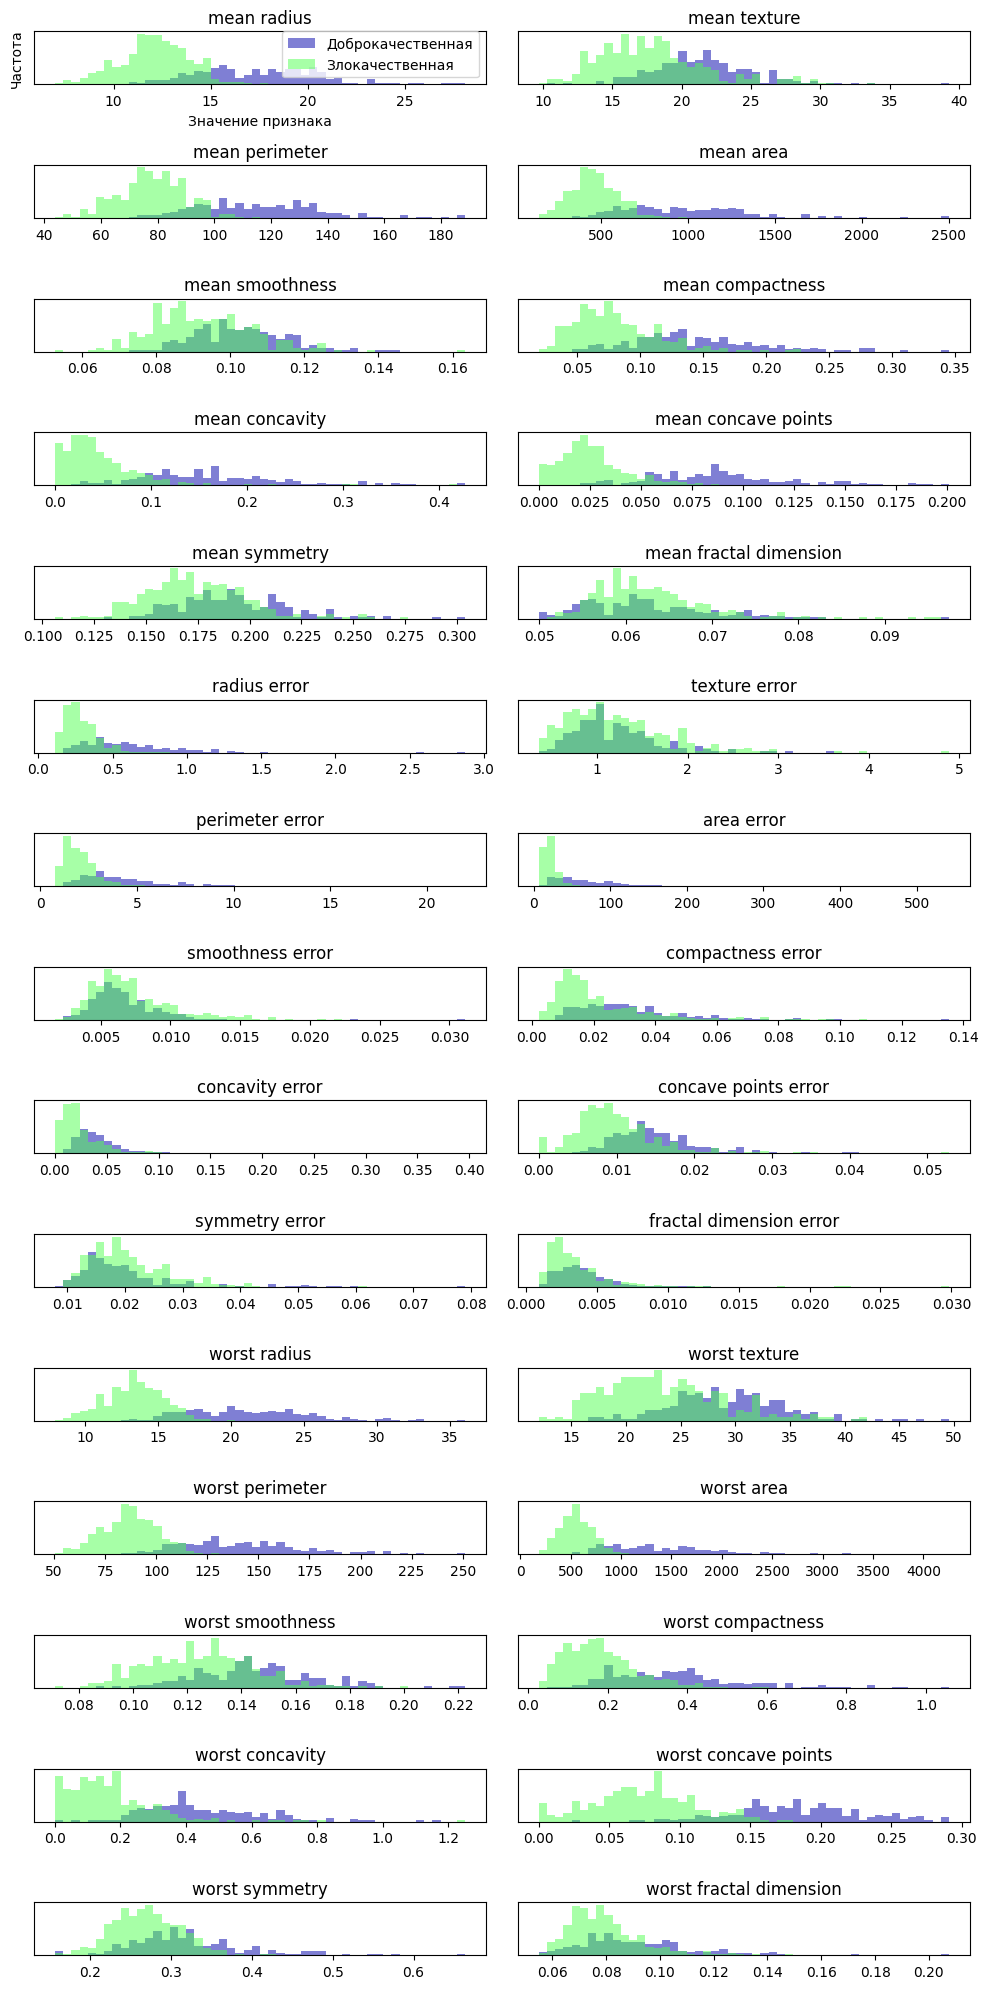

Форма исходного массива: (569, 30)
Форма массива после сокращения размерности: (569, 2)



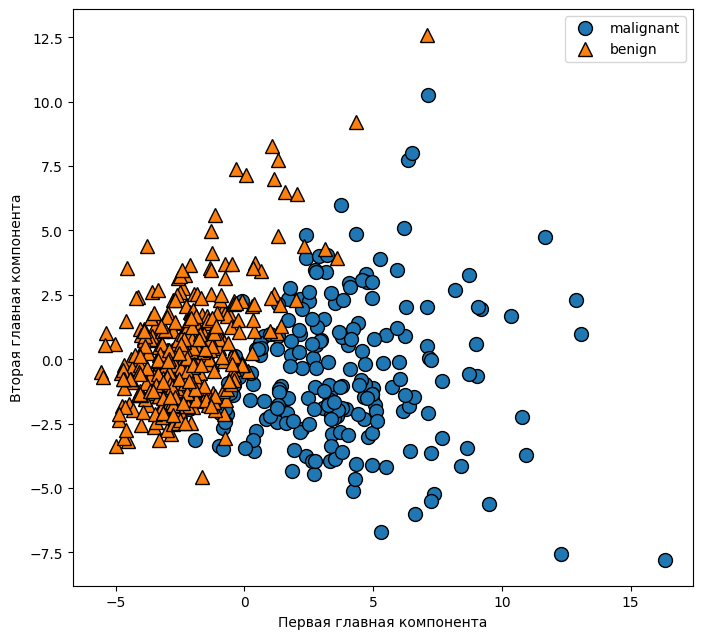

Форма главных компонент: (2, 30)
Компоненты PCA: (2, 30)


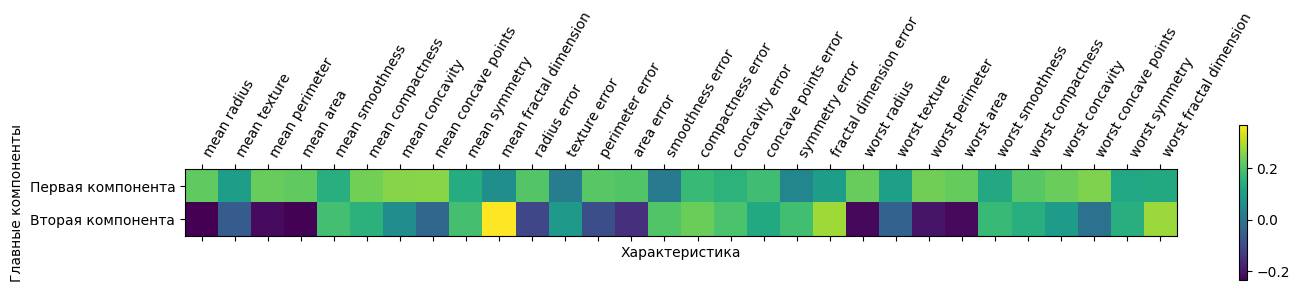

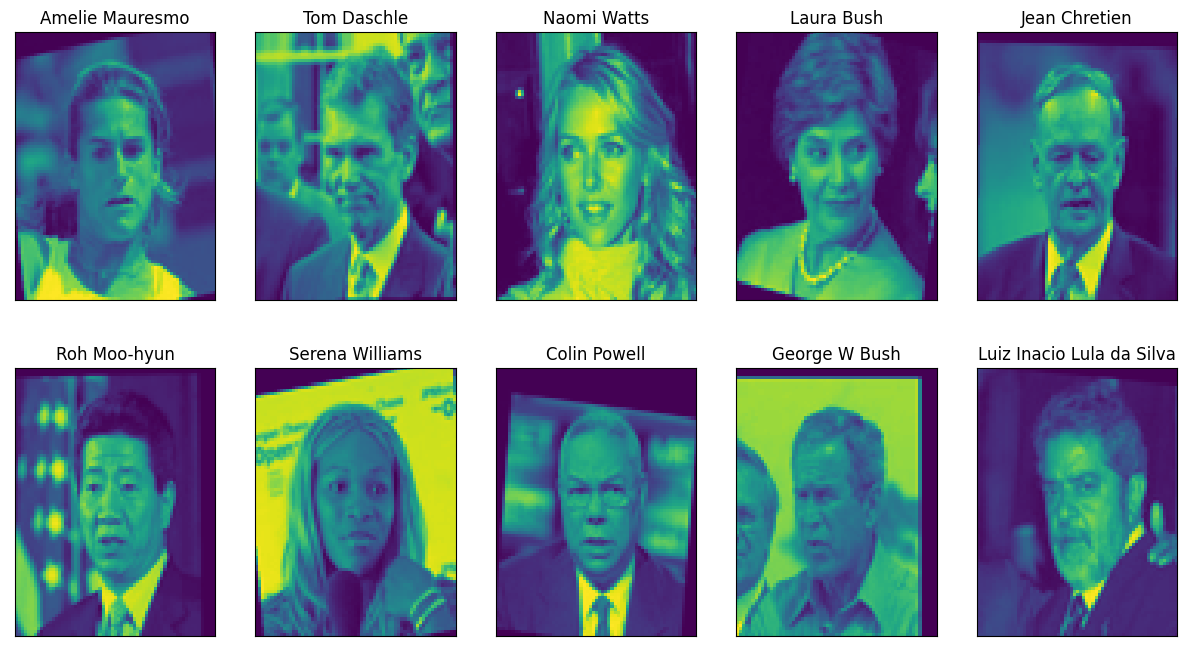

Форма массива изображений лиц: (2986, 87, 65)
Количество классов: 61

Alejandro Toledo 39 Alvaro Uribe 35 Amelie Mauresmo 21 
Andre Agassi 36 Angelina Jolie 20 Ariel Sharon 77 
Arnold Schwarzenegger 42 Atal Bihari Vajpayee 24 Bill Clinton 29 
Carlos Menem 21 Colin Powell 236 David Beckham 31 
Donald Rumsfeld 121 George Robertson 22 George W Bush 530 
Gerhard Schroeder 109 Gloria Macapagal Arroyo 44 Gray Davis 26 
Guillermo Coria 30 Hamid Karzai 22 Hans Blix 39 
Hugo Chavez 71 Igor Ivanov 20 Jack Straw 28 
Jacques Chirac 52 Jean Chretien 55 Jennifer Aniston 21 
Jennifer Capriati 42 Jennifer Lopez 21 Jeremy Greenstock 24 
Jiang Zemin 20 John Ashcroft 53 John Negroponte 31 
Jose Maria Aznar 23 Juan Carlos Ferrero 28 Junichiro Koizumi 60 
Kofi Annan 32 Laura Bush 41 Lindsay Davenport 22 
Lleyton Hewitt 41 Luiz Inacio Lula da Silva 48 Mahmoud Abbas 29 
Megawati Sukarnoputri 33 Michael Bloomberg 20 Naomi Watts 22 
Paul Bremer 20 Pete Sampras 22 Recep Tayyip Erdogan 30 
Ricardo Lagos 27 Roh M

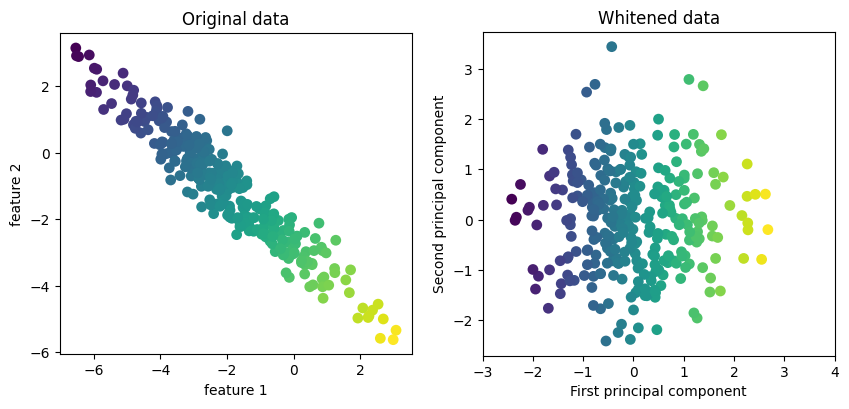

Обучающие данные после PCA: (1519, 50)

Правильность на тестовом наборе: 0.16173570019723865
Форма pca.components_: (50, 5655)
________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[-0.784065, ...,  0.510944],
       ...,
       [ 0.839295, ...,  0.159972]], dtype=float32), 
array([[-1.020915, ...,  0.947576],
       ...,
       [-1.419326, ..., -0.501253]], dtype=float32))


ValueError: n_components=100 must be between 0 and min(n_samples, n_features)=50 with svd_solver='full'

In [6]:
import warnings

import mglearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier


def plot_pca_illustration_show():
    mglearn.plots.plot_pca_illustration()
    plt.show()


def load_breast_cancer_show():
    cancer = load_breast_cancer()

    fig, axes = plt.subplots(15, 2, figsize=(10, 20))
    malignant = cancer.data[cancer.target == 0]
    bening = cancer.data[cancer.target == 1]
    ax = axes.ravel()

    for i in range(30):
        _, bins = np.histogram(cancer.data[:, i], bins=50)
        ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
        ax[i].hist(bening[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
        ax[i].set_title(cancer.feature_names[i])
        ax[i].set_yticks(())
        ax[0].set_xlabel('Значение признака')
        ax[0].set_ylabel('Частота')
    ax[0].legend(['Доброкачественная', 'Злокачественная'], loc='best')
    fig.tight_layout()
    plt.show()


def scaler_and_cancer_show():
    cancer = load_breast_cancer()
    scaler = StandardScaler().fit(cancer.data)

    X_scaled = scaler.transform(cancer.data)
    pca = PCA(n_components=2).fit(X_scaled)
    X_pca = pca.transform(X_scaled)

    print(f'Форма исходного массива: {X_scaled.shape}\n'
          f'Форма массива после сокращения размерности: {X_pca.shape}\n')

    plt.figure(figsize=(8, 8))
    mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
    plt.legend(cancer.target_names, loc='best')
    plt.gca().set_aspect('equal')
    plt.xlabel('Первая главная компонента')
    plt.ylabel('Вторая главная компонента')
    plt.show()

    print(f'Форма главных компонент: {pca.components_.shape}\n'
          f'Компоненты PCA: {pca.components_.shape}')

    plt.matshow(pca.components_, cmap='viridis')
    plt.yticks([0, 1], ['Первая компонента', 'Вторая компонента'])
    plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
    plt.colorbar()
    plt.xlabel('Характеристика')
    plt.ylabel('Главные компоненты')
    plt.show()


def fetch_lfw_people_show():
    people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
    image_shape = people.images[0].shape

    fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    for target, image, ax in zip(people.target, people.images, axes.ravel()):
        ax.imshow(image)
        ax.set_title(people.target_names[target])
    plt.show()

    print(f'Форма массива изображений лиц: {people.images.shape}\n'
          f'Количество классов: {len(people.target_names)}\n')

    counts = np.bincount(people.target)
    for i, (count, name) in enumerate(zip(counts, people.target_names)):
        print(f'{name} {count}', end=' ')
        if (i + 1) % 3 == 0:
            print()

    mask = np.zeros(people.target.shape, dtype=np.bool)
    for target in np.unique(people.target):
        mask[np.where(people.target == target)[0][:50]] = 1

    X_people = people.data[mask]
    y_people = people.target[mask]
    X_people /= 255

    X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
    knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
    print(f'Правильность на тестовом наборе: {knn.score(X_test, y_test)}')

    mglearn.plots.plot_pca_whitening()
    plt.show()

    pca = PCA(n_components=50, whiten=True, random_state=0)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print(f'Обучающие данные после PCA: {X_train_pca.shape}\n')

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_pca, y_train)
    print(f'Правильность на тестовом наборе: {knn.score(X_test_pca, y_test)}\n'
          f'Форма pca.components_: {pca.components_.shape}')

    mglearn.plots.plot_pca_faces(X_train_pca, X_test_pca, image_shape)
    plt.show()

    mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
    plt.xlabel('Первая главная компонента')
    plt.ylabel('Вторая главная компонента')
    plt.show()


def main():
    warnings.filterwarnings('ignore')

    plot_pca_illustration_show()
    load_breast_cancer_show()
    scaler_and_cancer_show()
    fetch_lfw_people_show()


main()